In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')  # Adjust path if needed
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
def clean_text(text):
    text = re.sub('<.*?>', '', text)  # Remove HTML tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # Keep only alphabets
    text = text.lower()  # Convert to lowercase
    return text

df['review'] = df['review'].apply(clean_text)
print(df['review'].head())


0    one of the other reviewers has mentioned that ...
1    a wonderful little production  the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there s a family where a little boy ...
4    petter mattei s  love in the time of money  is...
Name: review, dtype: object


In [ ]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there s a family where a little boy ...,0
4,petter mattei s love in the time of money is...,1


In [ ]:
tokenizer = Tokenizer(num_words=5000)  # Use the top 5000 words
tokenizer.fit_on_texts(df['review'])

sequences = tokenizer.texts_to_sequences(df['review'])
padded_sequences = pad_sequences(sequences, maxlen=200)  # Set max length to 200

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['sentiment'], test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))  # Embedding layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))  # 1D Convolution layer
model.add(MaxPooling1D(pool_size=2))  # Max pooling layer
model.add(Flatten())  # Flatten to 1D for Dense layers
model.add(Dense(64, activation='relu'))  # Fully connected layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 125ms/step - accuracy: 0.6677 - loss: 0.5522 - val_accuracy: 0.8894 - val_loss: 0.2611
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.9090 - loss: 0.2402 - val_accuracy: 0.8897 - val_loss: 0.2593
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 125ms/step - accuracy: 0.9379 - loss: 0.1717 - val_accuracy: 0.8874 - val_loss: 0.2839
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - accuracy: 0.9602 - loss: 0.1139 - val_accuracy: 0.8815 - val_loss: 0.3288
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 127ms/step - accuracy: 0.9796 - loss: 0.0605 - val_accuracy: 0.8750 - val_loss: 0.4095


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Accuracy (As a percentage): {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8730 - loss: 0.4123
Test Accuracy: 0.875
Test Accuracy (As a percentage): 87.50%


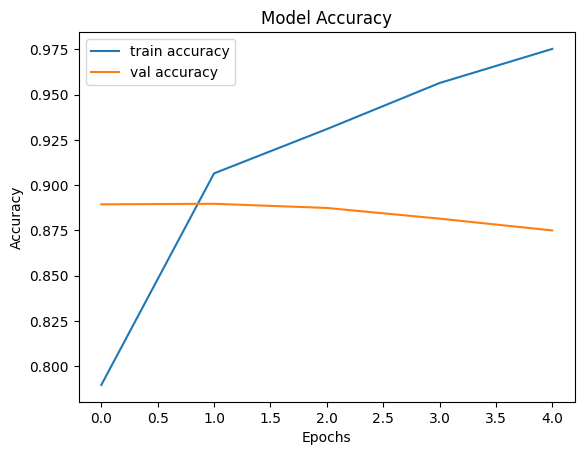

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
new_review = "This movie was fantastic! I loved it."
new_review_cleaned = clean_text(new_review)
sequence = tokenizer.texts_to_sequences([new_review_cleaned])
padded_sequence = pad_sequences(sequence, maxlen=200)
prediction = model.predict(padded_sequence)
print("Positive" if prediction >= 0.5 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Positive


In [ ]:
model.save('/content/drive/My Drive/sentiment_cnn_model.h5')
